In [11]:
import warnings
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from brain_decoding.config.file_path import RESULT_PATH, DATA_PATH
from brain_decoding.utils.analysis import (
    prediction_curve, correlation_heatmap, smooth_columns, combine_continuous_scores, stage_box_plot, read_sleep_score,
    correlation_heatmap_by_stage, multi_facet_correlation_heatmap, load_prediction, filter_predictions, concept_frequency,
    add_label_count
)

from brain_decoding.param.param_data import MOVIE24_LABELS
from brain_decoding.param.param_data import TWILIGHT_LABELS
from brain_decoding.param.param_data import TWILIGHT_LABELS_MERGE
from brain_decoding.param.param_data import TWILIGHT_24_LABELS
from brain_decoding.config.file_path import TWILIGHT_MERGE_LABEL_PATH, TWILIGHT_LABEL_PATH, MOVIE24_LABEL_PATH

# Suppress all UserWarning messages
warnings.filterwarnings('ignore', category=UserWarning)

activation_path = os.path.join(
    RESULT_PATH, 
    'twilight_vs_24/570_None_multi-vit_test_optimalX_CARX_2024-11-08_18-37-47/memory/prediction/epoch40_test_sleep_1_results.npy'
    # 'movie_24_merged/567_None_multi-vit_test_optimalX_CARX_2024-11-14_11-36-03/memory/prediction/epoch40_test_sleep_1_results.npy'
)
labels = TWILIGHT_24_LABELS

sleep_score_file = ''
# sleep_score_file = '/Users/XinNiuAdmin/Documents/brain_decoding/data/562/EXP6_Movie24&562_firstpass.csv'
# sleep_score_file = '/Users/XinNiuAdmin/Documents/brain_decoding/data/566/EXP8_Movie24&566_firstpass.csv'
# sleep_score_file = '/Users/XinNiuAdmin/Documents/brain_decoding/data/567/EXP9_Movie24&567_firstpass.csv'

file_path = os.path.dirname(activation_path)

sleep_score = None
if sleep_score_file:
    sleep_score = read_sleep_score(sleep_score_file)
    sleep_score.head(5)

Count the number of 250 ms intervals for each concept:

In [12]:
concept_count, _ = concept_frequency(MOVIE24_LABEL_PATH, labels)
print(concept_count)

{'Twilight': 530, '24': 741}


In [13]:
predictions = load_prediction(activation_path)
predictions, labels = filter_predictions(predictions, labels, .0)
np.sum(predictions, axis=1)

shape of predictions: (118417, 2), duration: 8.223402777777778 hours


array([0.99999839, 0.99997839, 1.02067925, ..., 0.99998282, 0.99993624,
       0.99983281])

- Total duration of sleep data is ~8 hours, the sampling interval for `predictions` is .25 seconds.
- Each label in the sleep score file is 30 seconds.

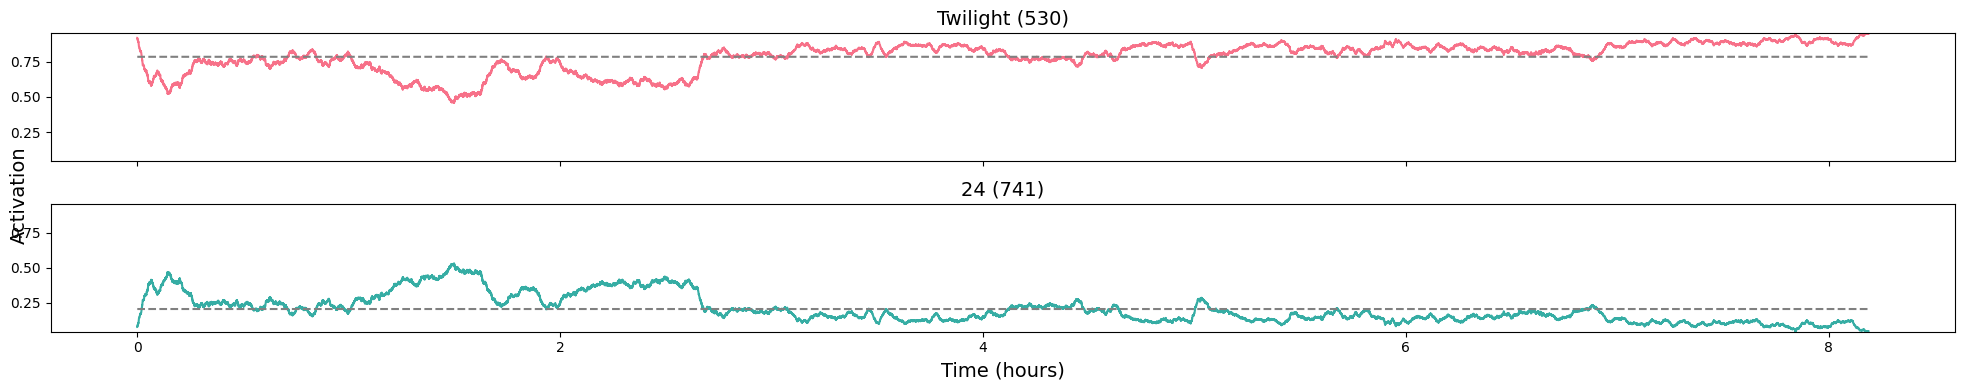

In [14]:
# Function to apply moving average smoothing
window_size = 500
result_path = os.path.join(file_path, 'epoch40_activation.png')
labels_with_count = add_label_count(labels, concept_count)
smoothed_predictions = smooth_columns(predictions, window_size)
prediction_curve(smoothed_predictions, sleep_score, labels_with_count, result_path)

## Box plot of prediction values (>.5) for each sleep stage. 
Stages shorter than 10 mins are excluded

In [15]:
result_path = os.path.join(file_path, 'epoch40_activation_box.png')
stage_box_plot(predictions, sleep_score, labels, result_path, .1)

## Correlation of activations for each concept

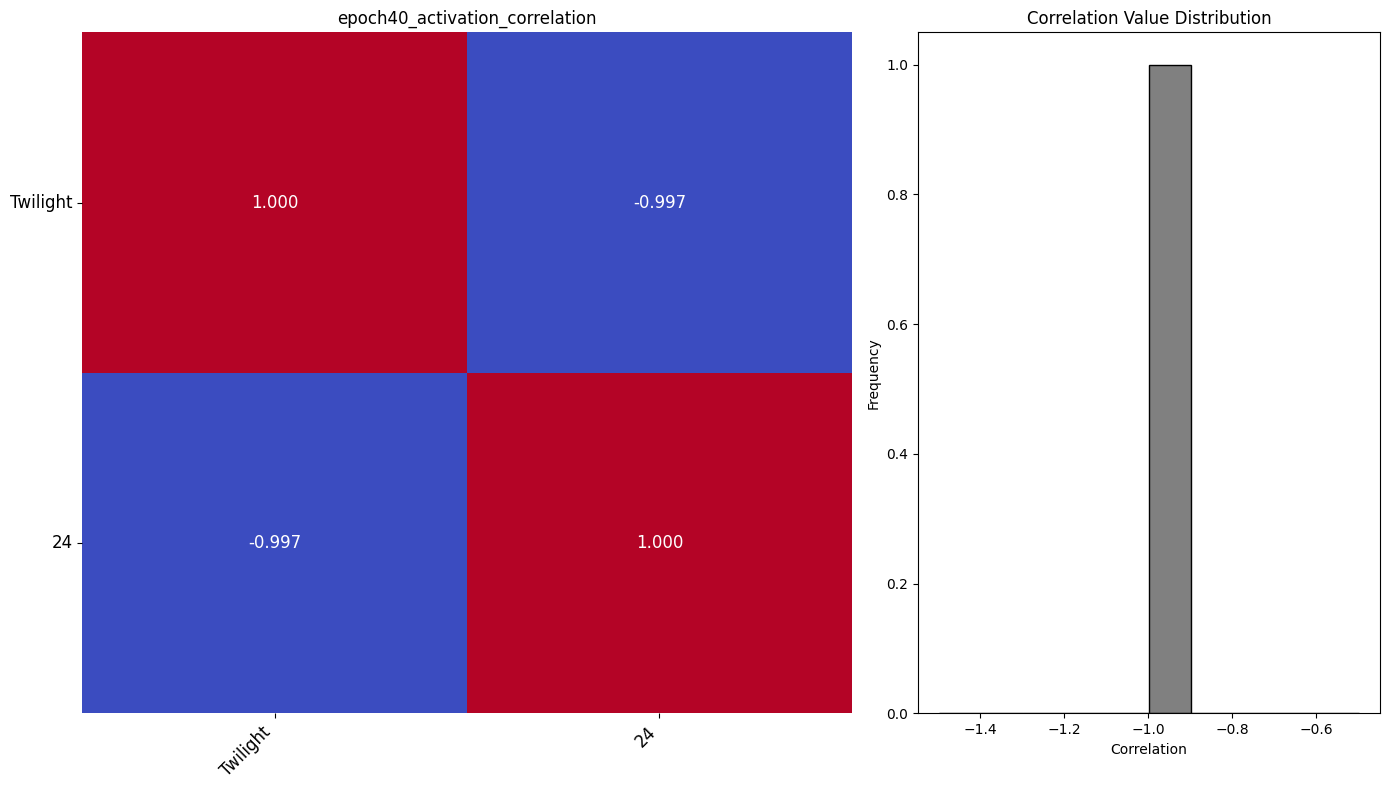

In [16]:
result_path = os.path.join(file_path, 'epoch40_activation_correlation.png')
correlation_heatmap(predictions, labels, result_path)

## correlation of activations for each sleep stage
Only stages longer than 10 mins are included.

In [17]:
result_path = os.path.join(file_path, 'epoch40_activation_correlation_by_stage.png')
multi_facet_correlation_heatmap(predictions, labels, sleep_score, result_path)